# Analysis of hip ROIs

In [1]:
import os
import matplotlib.pyplot as plt

from wikisim import rsa
from wikisim import figures

rsa_dir = '/Users/morton/Dropbox/work/bender/batch/rsa'
fig_dir = '/Users/morton/Dropbox/work/bender/figs_wikisim3/rois'
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

# controls plot precision; use 1000 for testing, 100000 for final
opt = {'n_perm': 100000, 'n_boot': 100000, 
       'max_offset': 4, 'sig_offset': 3.5}
figsize = (3.5, 2.5)

rois = rsa.define_network(
    ['hmx_use_face_hip_dil2', 'hmx_use_scene_hip_dil2'],
    ['Face cluster', 'Scene cluster'], [0, 0],
    ['cluster1', 'cluster2'], ['cluster1', 'cluster2']
)

## Face semantics

Controlling for just the visual model, adding gender, and adding occupation.

In [2]:
zstat_face_hmx_use = rsa.load_net_zstat(
    rsa_dir, 'prsa_hmx_use', 'face', rois
)
zstat_face_hmx_sub_use = rsa.load_net_zstat(
    rsa_dir, 'prsa_hmx_sub_use', 'face', rois
)
zstat_face_hmx_sub_occ_use = rsa.load_net_zstat(
    rsa_dir, 'prsa_hmx_sub_occ_use', 'face', rois
)

,mean,sem,std,p,p_cor,d
Face cluster,0.509107,0.161624,0.928457,0.001630,0.001180,0.548337
Scene cluster,-0.057071,0.167956,0.964835,0.633404,0.626364,0.059151


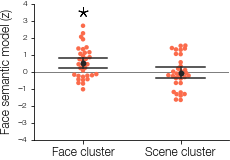

In [4]:
fig, ax = plt.subplots(figsize=figsize)
sig = figures.plot_zstat_perm(
    zstat_face_hmx_sub_use, 'wiki_use1', 'face', ax=ax, **opt
)
fig.savefig(os.path.join(fig_dir, 'prsa_hip_face_sub_use.pdf'))
sig

,mean,sem,std,p,p_cor,d
Face cluster,0.515496,0.122580,0.704166,0.000140,0.001705,0.732066
Scene cluster,-0.013042,0.195262,1.121694,0.525125,0.529200,0.011627


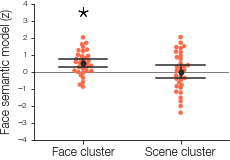

In [5]:
fig, ax = plt.subplots(figsize=figsize)
sig = figures.plot_zstat_perm(
    zstat_face_hmx_sub_occ_use, 'wiki_use1', 'face', ax=ax, **opt
)
fig.savefig(os.path.join(fig_dir, 'prsa_hip_face_sub_occ_use.pdf'))
sig

## Scene semantics

Controlling for just the visual model, then adding visual category and subcategory.

In [6]:
zstat_scene_hmx_use = rsa.load_net_zstat(
    rsa_dir, 'prsa_hmx_use', 'scene', rois
)
zstat_scene_hmx_sub_typ_use = rsa.load_net_zstat(
    rsa_dir, 'prsa_hmx_sub_typ_use', 'scene', rois
)

,mean,sem,std,p,p_cor,d
Face cluster,0.152310,0.178970,1.028107,0.201598,0.188553,0.148146
Scene cluster,0.401854,0.145703,0.837002,0.003970,0.007700,0.480112


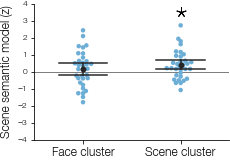

In [8]:
fig, ax = plt.subplots(figsize=figsize)
sig = figures.plot_zstat_perm(
    zstat_scene_hmx_sub_typ_use, 'wiki_use1', 'scene', ax=ax, **opt
)
fig.savefig(os.path.join(fig_dir, 'prsa_hip_scene_sub_typ_use.pdf'))
sig